# Kirkland Fig. 3.14

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
from ase import Atoms
import matplotlib.pyplot as plt

from tensorwaves.waves import ProbeWaves

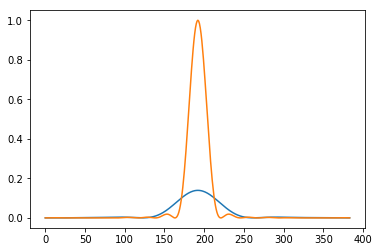

In [2]:
uncorrected = ProbeWaves(extent=16, gpts=512, energy=100e3, aperture_cutoff=0.0103)
uncorrected.positions = (8,8)
uncorrected.aberrations.defocus = 674
uncorrected.aberrations.Cs = -1.3e7

corrected = ProbeWaves(extent=16, gpts=512, energy=100e3, aperture_cutoff=0.025)
corrected.positions = (8,8)

uncorrected_image = np.abs(uncorrected.build().numpy())**2
uncorrected_image /= np.sum(uncorrected_image)

corrected_image = np.abs(corrected.build().numpy())**2
corrected_image /= np.sum(corrected_image)

normalization = np.max(corrected_image)

corrected_image /= normalization
uncorrected_image /= normalization

plt.plot(uncorrected_image[0,256,64:-64], label='uncorrected')
plt.plot(corrected_image[0,256,64:-64], label='corrected')